# Other dataset

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("data/Evaluation of three potential ML algorithms - train-test.csv")
data

,Wind speed,Thrust coefficient,s (x/D),r,r/R,Velocity,TKE,TI,TI(%)
0,7,0.536453,0.5,0.000000,0.000000,6.881098,0.041220,0.024091,2.409070
1,7,0.536453,0.5,0.151515,0.030128,6.871302,0.042116,0.024386,2.438600
2,7,0.536453,0.5,0.303030,0.060257,6.819288,0.042842,0.024783,2.478289
3,7,0.536453,0.5,0.454545,0.090385,6.767278,0.043568,0.025184,2.518408
4,7,0.536453,0.5,0.606061,0.120513,6.714196,0.044380,0.025619,2.561856
...,...,...,...,...,...,...,...,...,...
10395,22,0.142007,12.5,14.393930,2.862185,22.023577,0.000188,0.000509,0.050929
10396,22,0.142007,12.5,14.545445,2.892314,22.023737,0.000176,0.000492,0.049230
10397,22,0.142007,12.5,14.696960,2.922442,22.023876,0.000165,0.000477,0.047710
10398,22,0.142007,12.5,14.848475,2.952570,22.023998,0.000156,0.000463,0.046316


In [13]:
Xs = data["s (x/D)"].unique()
Ys = data["r"].unique()
shape = len(Xs), len(Ys)
shape

(17, 198)

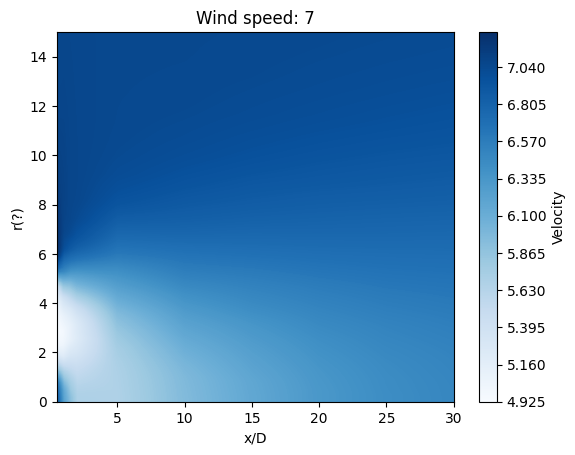

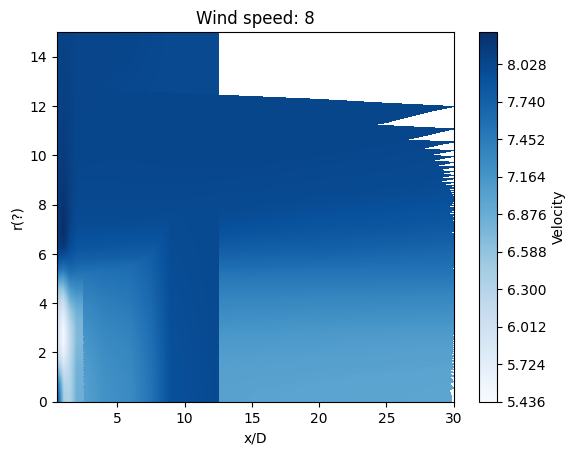

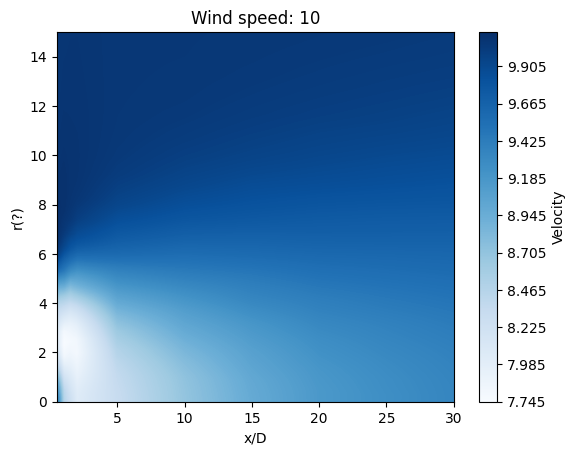

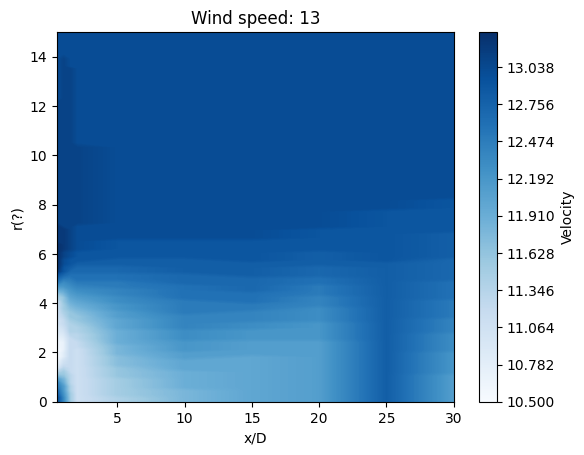

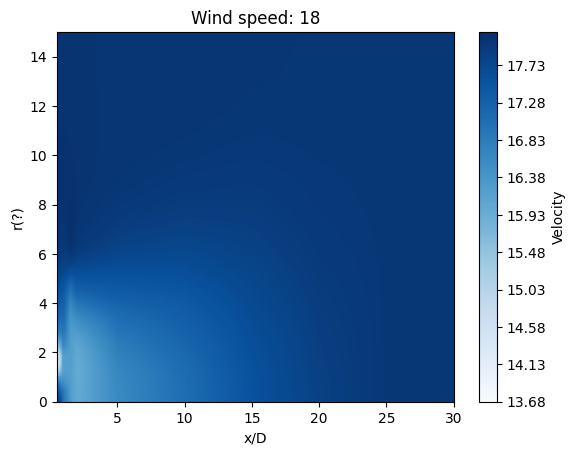

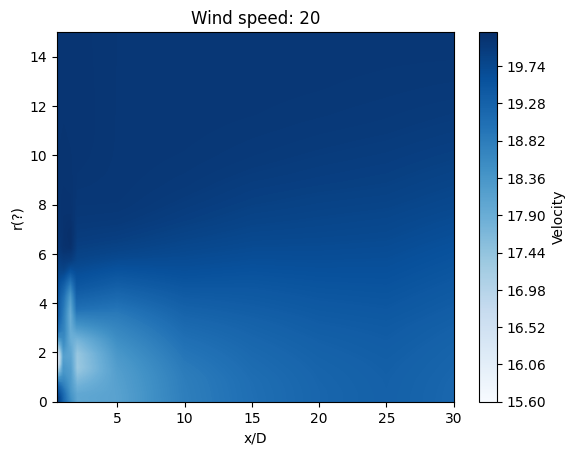

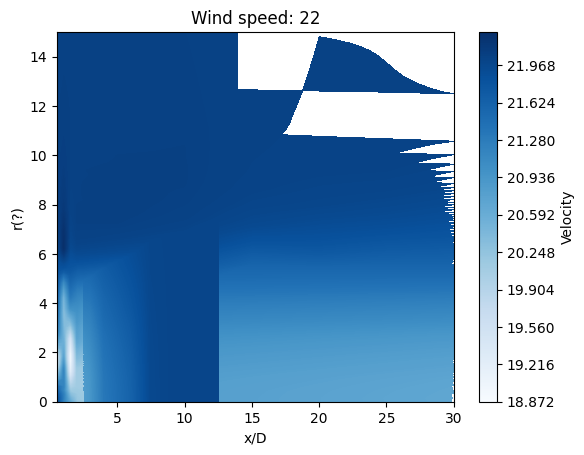

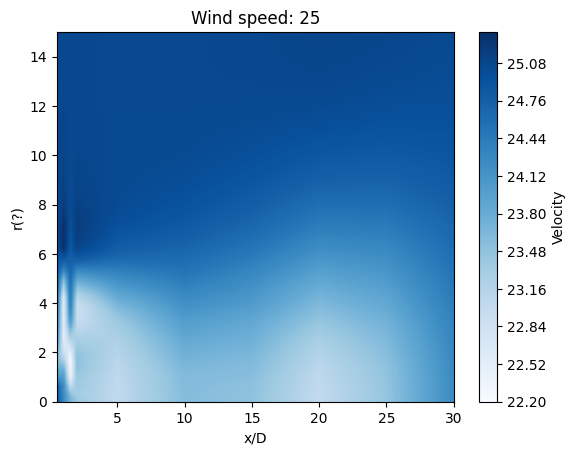

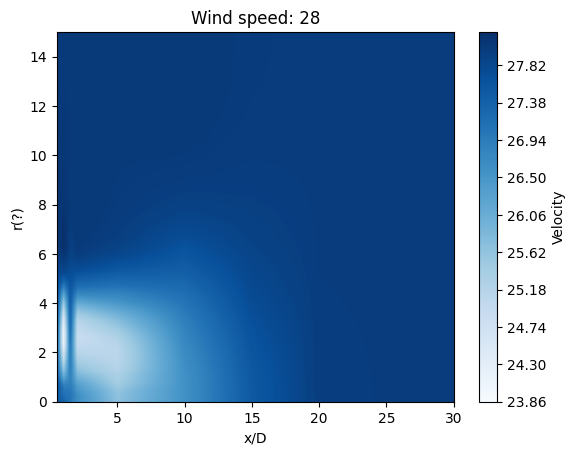

In [76]:
def plot_contour(X, Y, Z,
                   xlabel: str, ylabel: str, zlabel: str, title: str,
                   levels = 500, cmap: str = "Blues", ax = None) -> None:
    show=False
    if ax is None:
        ax = plt.gca()
        show = True
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    c = ax.contourf(X, Y, Z, levels=levels, cmap=cmap)
    plt.colorbar(c, label=zlabel, ax=ax)
    if show:
        plt.show()

for wind_speed, subdf in data.groupby('Wind speed'):
    assert not subdf[['s (x/D)', 'r/R']].duplicated().any()
    X, Y = np.meshgrid(subdf["s (x/D)"].unique(), subdf["r"].unique())
    Z = subdf.pivot(index='r', columns='s (x/D)', values="Velocity").values
    plot_contour(X, Y, Z, "x/D", "r(?)", "Velocity", title=f"Wind speed: {wind_speed}")

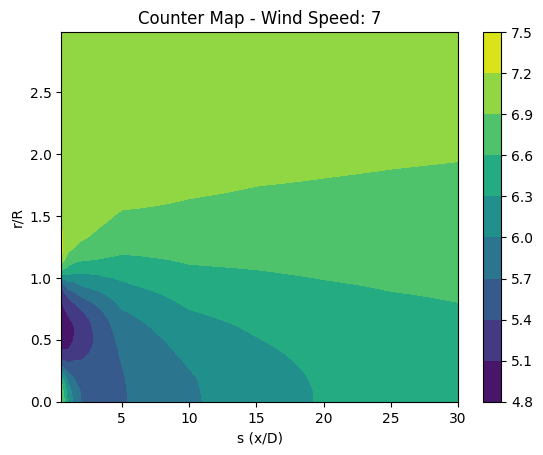

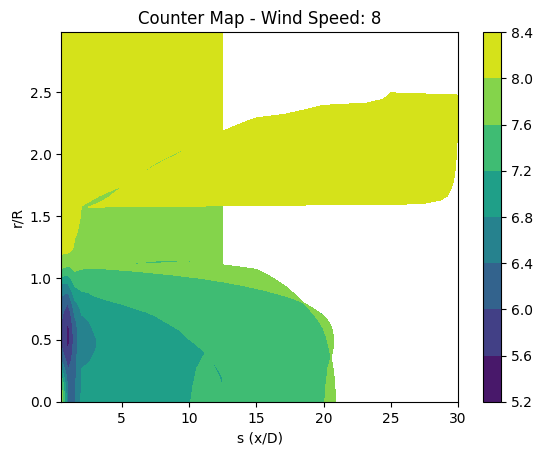

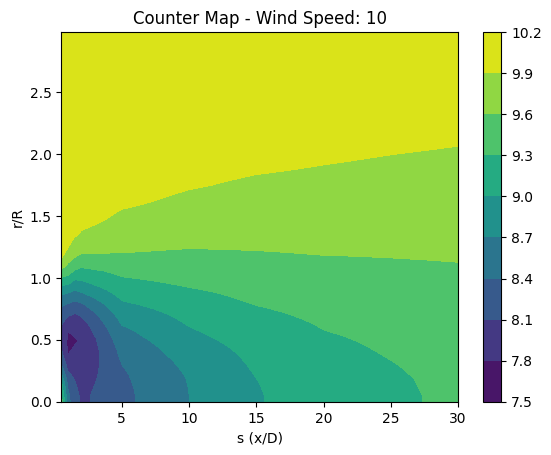

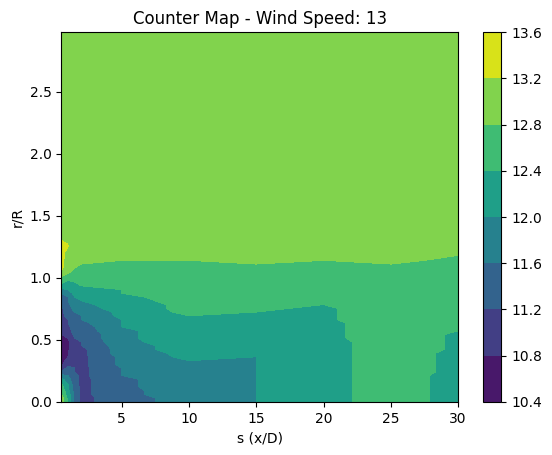

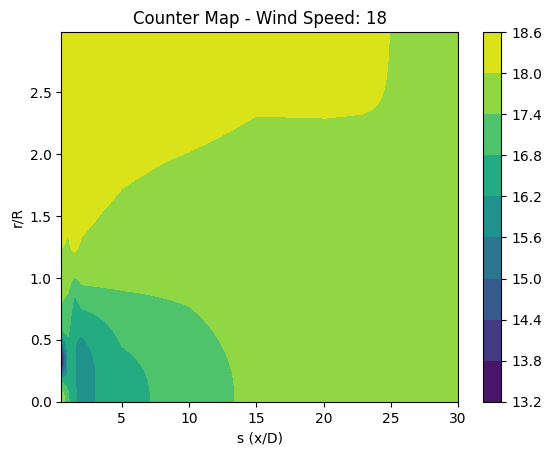

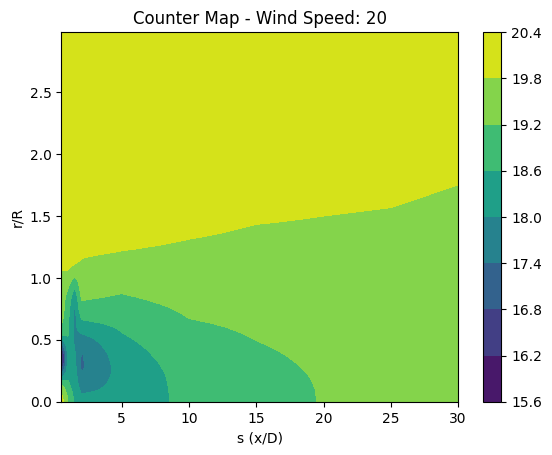

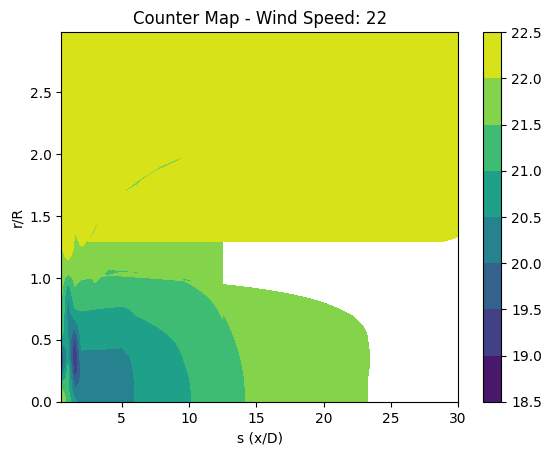

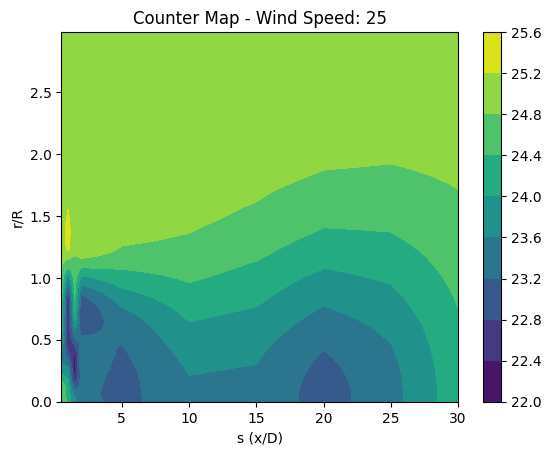

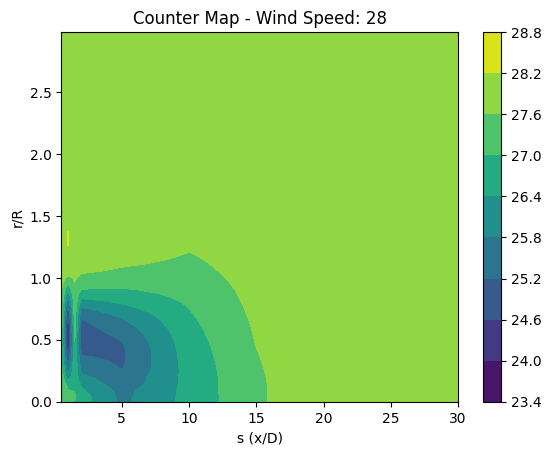

In [52]:
for wind_speed, group in data.groupby("Wind speed"):
    s_values = group['s (x/D)']
    r_values = group['r/R']
    velocity_values = group['Velocity']

    # Create a meshgrid using unique 's (x/D)' and 'r/R' values
    s_mesh, r_mesh = np.meshgrid(s_values.unique(), r_values.unique())

    # Create an empty 2D array for counter values
    counter_values = np.zeros_like(s_mesh)

    # Fill the counter values array with corresponding velocity values
    for s, r, velocity in zip(s_values, r_values, velocity_values):
        s_index = np.where(s_mesh[0] == s)[0][0]
        r_index = np.where(r_mesh[:, 0] == r)[0][0]
        counter_values[r_index, s_index] = velocity

    # Plot the counter map for the current wind speed
    plt.figure()
    plt.contourf(s_mesh, r_mesh, counter_values)
    plt.colorbar()
    plt.title(f'Counter Map - Wind Speed: {wind_speed}')
    plt.xlabel('s (x/D)')
    plt.ylabel('r/R')
    plt.show()


# Metrics

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

metrics = pd.read_csv("results.csv")
metrics

,model_description,prediction_time,r2_score,explained_variance_score,mean_squared_error,mean_absolute_error,median_absolute_error,mean_absolute_percentage_error,timestamp
0,univariate_NN_layers50-250 (act. func. Sigmoid),4.820708e-06,0.338589,3.387249e-01,7.634339e-04,0.012068,0.003819,4.273045e+11,02-06-2023_11-22-20
1,multivariate_NN_layers50-500 (act. func. Sigmoid),4.810854e-04,0.966923,9.676476e-01,4.002708e-06,0.001063,0.000753,2.461820e+11,02-06-2023_11-39-21
2,Multivariate_LR_discr_factors_x2_30_y-2_2_step...,3.207247e-05,0.753811,7.539763e-01,1.802236e-04,0.005995,0.004916,3.984784e+11,02-06-2023_11-51-58
3,univariate_LR_discr_factors_x2_30_y-2_2_step0....,5.310537e-09,0.206141,2.061650e-01,9.375417e-04,0.015099,0.008318,7.185653e+11,02-06-2023_12-10-37
4,multivariate_NN_layers50-500_consider_ws_discr...,4.961686e-05,0.910052,9.270976e-01,3.554369e-05,0.002952,0.002243,3.159913e+11,02-06-2023_20-31-22
5,multivariate_NN_layers50-500_consider_ws_discr...,8.056511e-05,0.910310,9.274790e-01,3.546776e-05,0.002955,0.002254,3.111475e+11,02-06-2023_20-42-40
6,multivariate_NN_layers50-500_discr_factors_x2_...,2.227449e-04,0.876308,8.953640e-01,5.735465e-05,0.003359,0.002159,2.312952e+11,06-06-2023_10-31-12
7,multivariate_NN_layers50-500_discr_factors_x2_...,2.430586e-04,0.995999,9.963756e-01,6.500572e-07,0.000411,0.000313,9.191911e+10,06-06-2023_10-51-59
8,multivariate_NN_layers50-500_discr_factors_x2_...,2.765466e-04,0.996266,9.972355e-01,1.739524e-07,0.000256,0.000186,3.782115e+10,06-06-2023_10-59-52
9,multivariate_NN_layers50-500_consider_ws_discr...,3.289333e-04,0.996487,9.986422e-01,2.323799e-07,0.000319,0.000276,2.763384e+10,06-06-2023_11-57-38


In [56]:
x_column = "number_of_components"

metrics = metrics.loc[metrics['model_description'].str.contains("approxGP")]
metrics[x_column] = metrics["model_description"].str.extract(r"approxGP_(\d+)fourier").astype(int)
metrics = metrics.sort_values(by=x_column)

metrics.drop(["model_description", "timestamp", "mean_absolute_percentage_error", "prediction_time"], axis=1, inplace=True)
metrics

/var/folders/9c/3x13fm0x7034gf06x85_2t180000gn/T/ipykernel_12719/2642797042.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics[x_column] = metrics["model_description"].str.extract(r"approxGP_(\d+)fourier").astype(int)


,r2_score,explained_variance_score,mean_squared_error,mean_absolute_error,median_absolute_error,number_of_components
21,0.025679,0.028075,0.001211,0.016694,0.010192,2
20,0.044151,0.079606,0.001188,0.017479,0.010073,4
19,0.081672,0.082701,0.001142,0.019079,0.013382,8
15,0.078893,0.088130,0.001145,0.018066,0.011083,10
18,0.002538,0.005602,0.001240,0.020174,0.013786,16
16,0.179738,0.186514,0.001020,0.018800,0.013047,32
17,-10.478075,-7.826287,0.014271,0.078882,0.038868,64


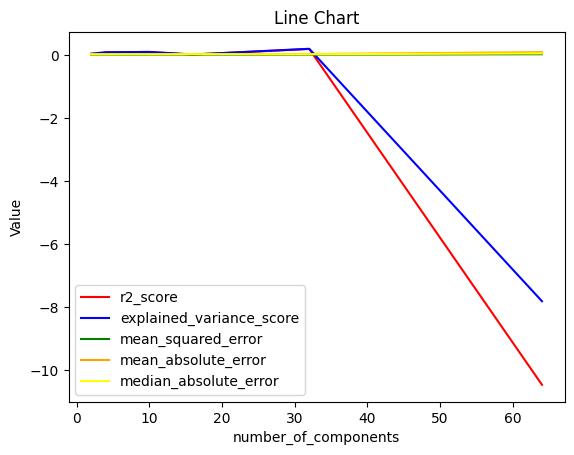

In [57]:
ax = metrics.plot(x=x_column, kind='line')
colors = ['red', 'blue', 'green', 'orange', 'yellow', 'purple', 'black']

for i, column in enumerate(metrics.columns):
    if column != x_column:
        ax.lines[i].set_color(colors[i % len(colors)])

"""
for column in enumerate(metrics.columns):
    if column != x_column:
        metrics.plot(x=x_column, y=column, kind='line', label=column)
"""


plt.xlabel(x_column)
plt.ylabel('Value')
plt.title('Line Chart')
plt.legend()
plt.show()


# Training time

In [5]:
from utils.metrics import MetricsLogger

logged_metrics_filepath = "logged_metrics/univariate_NeRF_64fourier-features_layers128-256-32_consider_ws_15-06-2023_23-28-11.csv"
metrics_logger = MetricsLogger.from_csv(logged_metrics_filepath)
metrics_logger.get_training_time('Training loss')

Logged the following metrics for univariate: ['Training loss', 'epoch_time (seconds)', 'Validation loss']
The best model has been generated during the 46th epoch and it took 230000 seconds for training.


230000

# Time comparison between pywake and my model simulations

In [3]:
import utils.utils as utils
import xarray as xr
import time
import itertools
import torch
import torch.nn as nn
import numpy as np

from py_wake.deficit_models import EddyViscosityModel

import utils.utils as utils
import utils.pywake_utils as py_wake_utils
import utils.data_utils as data_utils

# define random seeds for Neural Networks
torch.manual_seed(0)
np.random.seed(0)

# default parameters
TURBINE_X = [0]
TURBINE_Y = [0]
WIND_DIRECTION = 270 

# IEA37 values
TURBINE_DIAMETER = 198
TURBINE_HUB_HEIGHT = 119
TURBINE_POWER_NORM = 10000

# discretization factors
X_START_FACTOR = 2
X_END_FACTOR = 20
Y_START_FACTOR = -5
Y_END_FACTOR = 5
GRID_STEP_FACTOR = 1/8

# parameters for data generation
WS_RANGE = range(3, 26)
# TODO change the step sizes?
TI_STEP = 0.01
CT_STEP = 0.01
TIs = utils.my_arange(0, 1, TI_STEP)
CTs = utils.my_arange(0.2, 24/25, CT_STEP)

In [4]:
horizontal_grid = py_wake_utils.get_discretized_grid(TURBINE_DIAMETER,
                                       X_START_FACTOR, X_END_FACTOR, Y_START_FACTOR, Y_END_FACTOR,
                                       GRID_STEP_FACTOR)

ws_to_list = dict()
for wind_speed in WS_RANGE:
    datasets = list()

    start_time = time.time()

    for ti, ct in itertools.product(TIs, CTs):
        site = py_wake_utils.get_site(ti=ti, ws=wind_speed)
        wind_turbine = py_wake_utils.get_wind_turbine(TURBINE_DIAMETER, TURBINE_HUB_HEIGHT, TURBINE_POWER_NORM,
                                        constant_ct=ct, ti=ti)
        
        # single wake model
        ainslie_model = EddyViscosityModel(site, wind_turbine)

        ds = py_wake_utils.generate_wake_dataset(ainslie_model, wind_speed, WIND_DIRECTION,
                                    TURBINE_DIAMETER, TURBINE_X, TURBINE_Y,
                                    horizontal_grid, wind_turbine)
        datasets.append(ds)

    filepath = data_utils.get_filepath(X_START_FACTOR, X_END_FACTOR, Y_START_FACTOR, Y_END_FACTOR,
                                  GRID_STEP_FACTOR, wind_speed, TI_STEP, CT_STEP)
    final_ds = xr.concat([d.stack(z=['x:D', 'y:D', 'ti', 'ct']) for d in datasets], 'z').unstack('z')
    cacca = final_ds.load()
    
    end_time = time.time()
    execution_time = end_time - start_time
    num_simulations = len(datasets)
    print(f"For {wind_speed=}] Execution time: {execution_time} seconds for {num_simulations} simulations -> {(execution_time/num_simulations):2f}s per simulation")
    ws_to_list[wind_speed] = [num_simulations, execution_time]

tot_simulations = sum([num_sim for num_sim, _ in ws_to_list.values()])
tot_time = sum([ex_time for _, ex_time in ws_to_list.values()])
print(f"\nOverall execution time for {tot_simulations} simulations: {tot_time} seconds -> {tot_time/tot_simulations:2f}s per simulation")


<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


For wind_speed=3] Execution time: 8515.641827106476 seconds for 7600 simulations -> 1.120479s per simulation


<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


For wind_speed=4] Execution time: 8498.752365112305 seconds for 7600 simulations -> 1.118257s per simulation


<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


For wind_speed=5] Execution time: 8514.600550889969 seconds for 7600 simulations -> 1.120342s per simulation


<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


For wind_speed=6] Execution time: 8463.694307804108 seconds for 7600 simulations -> 1.113644s per simulation


KeyboardInterrupt: 

In [8]:
MODEL_PATH = "saved_models/discr_factors_x2_20_y-5_5_step0.125_TIstep0.01_CTstep0.01/multivariate_NN_layers50-500-2500.pt"
HIDDEN_LAYERS_UNITS = [int(lu) for lu in MODEL_PATH.split("layers")[-1].split(".pt")[0].split("-")]

class MultivariateNN(nn.Module):
    def __init__(self, input_space, output_space) -> None:
        super(MultivariateNN, self).__init__()
        layer_units = [input_space] + HIDDEN_LAYERS_UNITS + [output_space]
        layers = list()
        for first, second in zip(layer_units, layer_units[1:]):
            layers += [nn.Linear(first, second), nn.ReLU()]
        self.layers = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.layers(x)

model = MultivariateNN(2, 11520)
model.load_state_dict(torch.load(MODEL_PATH))
model.eval()

ws_to_list = dict()
with torch.no_grad():
    for wind_speed in WS_RANGE:
        datasets = list()

        start_time = time.time()

        for ti, ct in itertools.product(TIs, CTs):
            wake_field = model(torch.FloatTensor([ti, ct]))
            datasets.append(wake_field)

        end_time = time.time()
        execution_time = end_time - start_time
        num_simulations = len(datasets)
        print(f"For {wind_speed=}] Execution time: {execution_time} seconds for {num_simulations} simulations -> {(execution_time/num_simulations):2f}s per simulation")
        ws_to_list[wind_speed] = [num_simulations, execution_time]

tot_simulations = sum([num_sim for num_sim, _ in ws_to_list.values()])
tot_time = sum([ex_time for _, ex_time in ws_to_list.values()])
print(f"\nOverall execution time for {tot_simulations} simulations: {tot_time} seconds -> {tot_time/tot_simulations:2f}s per simulation")

For wind_speed=3] Execution time: 28.539746046066284 seconds for 7600 simulations -> 0.003755s per simulation
For wind_speed=4] Execution time: 28.614805936813354 seconds for 7600 simulations -> 0.003765s per simulation
For wind_speed=5] Execution time: 29.45336079597473 seconds for 7600 simulations -> 0.003875s per simulation
For wind_speed=6] Execution time: 28.728474140167236 seconds for 7600 simulations -> 0.003780s per simulation
For wind_speed=7] Execution time: 29.862894773483276 seconds for 7600 simulations -> 0.003929s per simulation
For wind_speed=8] Execution time: 29.59728980064392 seconds for 7600 simulations -> 0.003894s per simulation
For wind_speed=9] Execution time: 29.345993041992188 seconds for 7600 simulations -> 0.003861s per simulation
For wind_speed=10] Execution time: 29.615293979644775 seconds for 7600 simulations -> 0.003897s per simulation
For wind_speed=11] Execution time: 29.477768898010254 seconds for 7600 simulations -> 0.003879s per simulation
For wind_s

# Input parameters tuning

In [17]:
import random
import utils.plotting

DEFICIT_THRESHOLD = 1/100 #putting it to 1/1000, the region becomes too big

X_START_FACTOR = 2
X_END_FACTOR = 50
Y_START_FACTOR = -10
Y_END_FACTOR = 10

horizontal_grid = py_wake_utils.get_discretized_grid(TURBINE_DIAMETER,
                                       X_START_FACTOR, X_END_FACTOR, Y_START_FACTOR, Y_END_FACTOR,
                                       GRID_STEP_FACTOR)

x_ranges = list()
y_ranges = list()

for wind_speed in random.sample(list(WS_RANGE), 5):
    for ti, ct in random.sample(sorted(itertools.product(TIs, CTs)), 200):
        #print(f"{wind_speed=}\t{ti=}\t{ct=}")
        site = py_wake_utils.get_site(ti=ti, ws=wind_speed)
        wind_turbine = py_wake_utils.get_wind_turbine(TURBINE_DIAMETER, TURBINE_HUB_HEIGHT, TURBINE_POWER_NORM,
                                        constant_ct=ct, ti=ti)
        
        # single wake model
        ainslie_model = EddyViscosityModel(site, wind_turbine)

        df = py_wake_utils.generate_wake_dataset(ainslie_model, wind_speed, WIND_DIRECTION,
                                    TURBINE_DIAMETER, TURBINE_X, TURBINE_Y,
                                    horizontal_grid, wind_turbine)\
                .to_dataframe()\
                .reset_index()\
                .rename(columns={'x:D': 'x/D', 'y:D': 'y/D'})\
                .sort_values(by=['x/D', 'y/D'])

        filtered_df = df[df['wind_deficit'] > DEFICIT_THRESHOLD]
        if filtered_df.empty:
            utils.plotting.plot_deficit_map(df)
            continue

        x_range = np.nanmin(filtered_df['x/D']), np.nanmax(filtered_df['x/D'])
        y_range = np.nanmin(filtered_df['y/D']), np.nanmax(filtered_df['y/D'])

        #print("Range of x/D:", x_range)
        #print("Range of y/D:", y_range)
        x_ranges.append(x_range)
        y_ranges.append(y_range)

In [18]:
import statistics
x_ends = sorted([x_range[1] for x_range in x_ranges])
print(f"For x-end, min is: {min(x_ends)} and max is: {max(x_ends)},"+\
      f" with an average of {sum(x_ends) / len(x_ends)} and a median of {statistics.median(x_ends)}")

y_starts = sorted([y_range[0] for y_range in y_ranges])
print(f"For y-start, min is: {min(y_starts)} and max is: {max(y_starts)},"+\
      f" with an average of {sum(y_starts) / len(y_starts)} and a median of {statistics.median(y_starts)}")
y_ends = sorted([y_range[1] for y_range in y_ranges])
print(f"For y-end, min is: {min(y_ends)} and max is: {max(y_ends)},"+\
      f" with an average of {sum(y_ends) / len(y_ends)} and a median of {statistics.median(y_ends)}")

For x-end, min is: 6.25 and max is: 49.875, with an average of 30.989 and a median of 30.625
For y-start, min is: -2.0 and max is: -0.75, with an average of -1.535875 and a median of -1.625
For y-end, min is: 0.75 and max is: 2.0, with an average of 1.535875 and a median of 1.625


# Wind deficit values

In [12]:
# find the maximum deficit value
import os
from utils.data_utils import load_netcfd

max_wind_deficits = list()
folder = "data/discr_factors_x2_50_y-1_1_step0.125_TIstep0.01_CTstep0.01"
for file in os.listdir(folder):
    if file.startswith("."):
        continue
    wind_speed = file.split(".nc")[0].split("ws_")[1]
    df = load_netcfd(folder, wind_speed, include_ws_column=False)
    maxwd = df.wind_deficit.max()
    print(maxwd)
    max_wind_deficits.append(maxwd)

max_wind_deficits, max(max_wind_deficits)

0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9


([0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9],
 0.9)